<a href="https://colab.research.google.com/github/ViniciusTei/CCF425/blob/master/pratica4/Vinicius_3057_pratica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Vinicius Teixeira
* **Matrícula:**  3057

# Aula Prática 04
##  Inferência Estatística

**Objetivo:** Aplicar os conceitos de inferência estatística e intervalo de confiança para comparar duas amostras e verificar se elas provavelmente vieram de uma mesma população ou não. \
**Pré-requisitos:** linguagem de programação Python, Linux, estatística \
**Meta:** ao final da prática, o aluno será capaz de utilizar ferramentas de análise de dados para inferir sobre amostras de dados.

In [37]:
# Referencia para o uso da função ttest_ind https://tmfilho.github.io/pyestbook/math/03_scip.html#testes-de-hipotese
import pandas as pd
from scipy.stats import t, ttest_ind
import numpy as np

# definicao dos caminhos para os datasets
pathToDataAtrasoIA171 = 'https://raw.githubusercontent.com/ViniciusTei/CCF425/master/pratica4/atraso_ia171.csv'
pathToDataAtrasoIE666 = 'https://raw.githubusercontent.com/ViniciusTei/CCF425/master/pratica4/atraso_ie666.csv'
pathToDataTempoBitComb = 'https://raw.githubusercontent.com/ViniciusTei/CCF425/master/pratica4/tempo_bitcomb.csv'
pathToDataTempoCombinar = 'https://raw.githubusercontent.com/ViniciusTei/CCF425/master/pratica4/tempo_combinar.csv'

def testeHipotese(s1, s2, nameS1, nameS2):
  meanS1 = s1.mean()
  sdS1 = s1.std()

  meanS2 = s2.mean()
  sdS2 = s2.std()

  print(f'O valor da média de atraso da {nameS1} é: {meanS1}')
  print('O valor do seu desvio é: {:.2f}'.format(sdS1))
  print(f'O valor da média de atraso da {nameS2} é: {meanS2}')
  print('O valor do desvio é: {:.2f}'.format(sdS2))

  dataFrame = pd.DataFrame({
      nameS1: s1,
      nameS2: s2
  })

  dataFrame.hist()
  t_stat, p = ttest_ind(dataSeriesIA171, dataSeriesIE666, equal_var=False)

  if(p > 0.05):
    print(f'O valor-p de {p} sugere que a H0 seja aceita')
  else:
    print(f'O valor-p de {p} sugere que a H0 seja rejeitada')

print('Datasets path definitions are ready!')


Datasets path definitions are ready!


# Atividade 1

Você foi alocado no trabalho para decidir sobre qual protocolo de comunicação utilizar para a infraestrutura de IoT que será implantada na sua empresa. As duas opções são os protocolos IA171 e o IE666. O principal critério para a sua empresa é o atraso na transmissão. Então, você implementa os dois protocolos em um simulador de redes e coleta 100 valores de atrasos de transmissão para cada protocolo. Com base nesses valores, você deve decidir qual protocolo utilizar. Faça a análise desses resultados e elabore uma justificativa plausível e quantitativa para a utilização de um ou outro protocolo, ou se não há diferença significativa que indique que um protocolo é melhor que o outro. Utilize o teste de hipótese. Os resultados de atrasos estão em milissegundos nos arquivos atraso_ia171.csv atraso_ie666.csv. A empresa espera que você tenha uma confiança de 95% em sua decisão.

## Resposta

Para decidir qual protocolo utilizar na infraestrutura de IoT, podemos realizar um teste de hipótese para determinar se existe uma diferença significativa entre as médias dos atrasos de transmissão dos protocolos IA171 e IE666.

Primeiramente, podemos definir as hipóteses:

H0: Não há diferença significativa entre as médias dos atrasos de transmissão dos protocolos IA171 e IE666.

H1: Há diferença significativa entre as médias dos atrasos de transmissão dos protocolos IA171 e IE666.

Agora usando as bases de dados podemos obter alguns dados

O valor da média de atraso da IA171 é: 500.23060000000004
O valor do seu desvio é: 23.90
O valor da média de atraso da IE666 é: 186.78150000000002
O valor do desvio é: 53.28
O valor-p de 5.06956337907812e-94 sugere que a H0 seja rejeitada


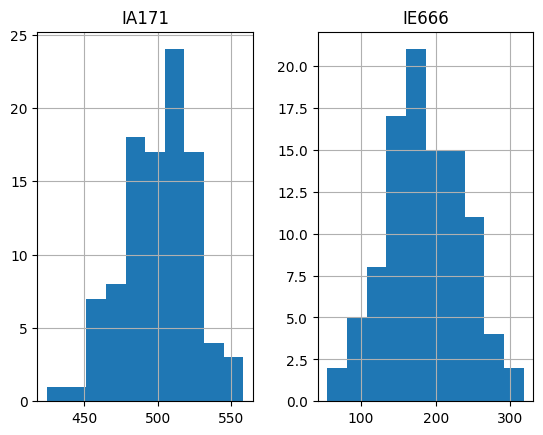

In [40]:
dataSeriesIA171 = pd.read_csv(pathToDataAtrasoIA171, index_col=False, header=None).squeeze("columns")
dataSeriesIE666 = pd.read_csv(pathToDataAtrasoIE666, index_col=False, header=None).squeeze("columns")
testeHipotese(dataSeriesIA171, dataSeriesIE666, 'IA171', 'IE666')

Foi possível analisar que Existe uma diferença significativa, na diferença das médias do atraso. E Foi possível ver que o protocole IE666 tem um atraso muito menor que o protocolo IA171. Ou seja, com base nos dados análisados é possível recomendar com segurança a utilização do protocolo IE666.

# Atividade 2

Você precisa implementar um algoritmo para calcular todas as possibilidades de senhas existentes considerando somente números e letras, de no máximo tamanho 8. Como um bom aluno que você é, você pesquisa no Google e encontra duas implementações prontas: CombNar e BitComb. Você então prepara vários testes para comparar os dois algoritmos em termos do tempo de execução em segundos. Os resultados de 100 execuções de cada algoritmo estão armazenados nos arquivos tempo_combinar.csv e tempo_bitcomb.csv. Com base nesses resultados, qual dos dois algoritmos você escolhe? Utilize o teste de hipótese e justifique sua resposta.

## Resposta

Para comparar o desempenho dos dois algorítimos usando o teste de hipótese, precisamos começar com as hipóteses.

H0: não há diferença significativa entre os tempos de execução dos dois algoritimos

H1: há uma diferença significativa entre eles

Agora partimos para o código, vamos usar a função definida no exercício anterior para nos mostrar os dados importante de cada base de dados e o valor-p.

O valor da média de atraso da BitComb é: 8.743500000000001
O valor do seu desvio é: 3.60
O valor da média de atraso da CombNar é: 9.540899999999999
O valor do desvio é: 3.96
O valor-p de 5.06956337907812e-94 sugere que a H0 seja rejeitada


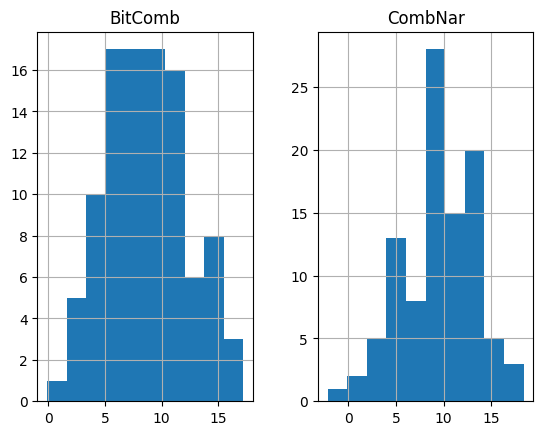

In [41]:
dataSeriesBitComb = pd.read_csv(pathToDataTempoBitComb, index_col=False, header=None).squeeze("columns")
dataSeriesCombinar = pd.read_csv(pathToDataTempoCombinar, index_col=False, header=None).squeeze("columns")
testeHipotese(dataSeriesBitComb, dataSeriesCombinar, 'BitComb', 'CombNar')

Foi possível analisar com base nos resultados que o tempo de execução é diferente, e seria razoável recomendar o algoritmo BitComb. Já que seu tempo médio é relativamente menor que o tempo médio do algoritmo CombNar.